# Weather Rainfall Prediction 

Training various Machine Learning models to predict an estimate for monthly rainfall

## Imports

In [46]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline

## Graphs

In [47]:
#rcParams['text.usetex'] = True
#rcParams['font.family'] = 'serif'
#rcParams['font.serif'] = ['Computer Modern Roman']  

def predicted_vs_actual(y_test, y_pred, title):
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel("Actual Rainfall")
    plt.ylabel("Predicted  Rainfall")
    plt.title(title)
    lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
    plt.plot(lims, lims, 'r--')
    plt.show()

## Metrics

In [48]:
def evaluate(y_test, y_pred, name):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} → MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}")
    return None


---


## Load DataFrame

In [49]:
aberporth = np.load("aberporth.npy")
cardiff = np.load("cardiff.npy")
valley = np.load("valley.npy")

headings = ["Year", "Month", "MaxTemp", "MinTemp", "FrostDays", "Rainfall"]

df_aberporth = pd.DataFrame(aberporth, columns = headings)
df_cardiff = pd.DataFrame(cardiff, columns = headings)
df_valley = pd.DataFrame(valley, columns = headings)

df_aberporth["Station"] = "Aberporth"
df_cardiff["Station"] = "Cardiff"
df_valley["Station"] = "Valley"

df = pd.concat([df_aberporth, df_cardiff, df_valley], ignore_index=True)
df = pd.get_dummies(df, columns=['Station'], drop_first=True)



## Split Data

In [50]:
# Main Splits

# Group K-Fold
X = df[['Year', 'Month', 'MinTemp', 'MaxTemp', 'FrostDays', 'Station_Cardiff', 'Station_Valley']]
y = df['Rainfall']

# Combined ALL STATIONS 80-20 Split
X1 = df[['Year', 'Month', 'MinTemp', 'MaxTemp', 'FrostDays']]
y1 = df['Rainfall']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Station Specific Splits

# Aberporth
X_aber = df_aberporth[['Year', 'Month', 'MinTemp', 'MaxTemp', 'FrostDays']]
y_aber = df_aberporth['Rainfall']
X_train_aber, X_test_aber, y_train_aber, y_test_aber = train_test_split(X_aber, y_aber, test_size=0.2, random_state=42)

# Cardiff
X_cardiff = df_cardiff[['Year', 'Month', 'MinTemp', 'MaxTemp', 'FrostDays']]
y_cardiff = df_cardiff['Rainfall']
X_train_cardiff, X_test_cardiff, y_train_cardiff, y_test_cardiff = train_test_split(X_cardiff, y_cardiff, test_size=0.2, random_state=42)


# Valley
X_valley = df_valley[['Year', 'Month', 'MinTemp', 'MaxTemp', 'FrostDays']]
y_valley = df_valley['Rainfall']
X_train_valley, X_test_valley, y_train_valley, y_test_valley = train_test_split(X_valley, y_valley, test_size=0.2, random_state=42)

---

## Cross Validation (LR, RF)

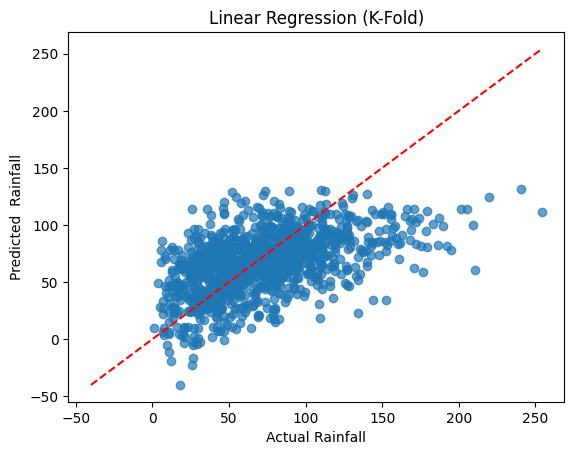

Linear Regression (K-Fold) → MAE: 26.33, RMSE: 34.41, R²: 0.221


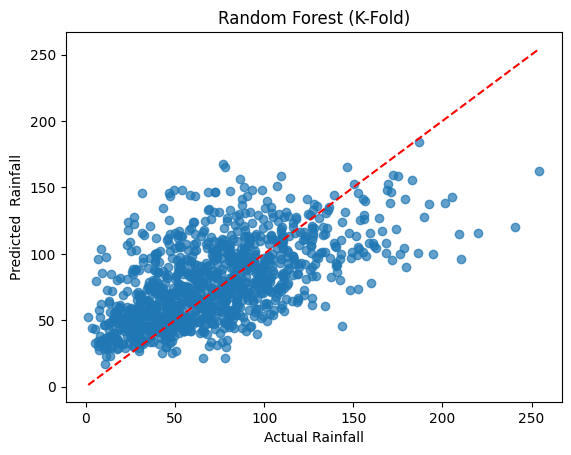

Random Forest (K-Fold) → MAE: 25.74, RMSE: 33.18, R²: 0.275


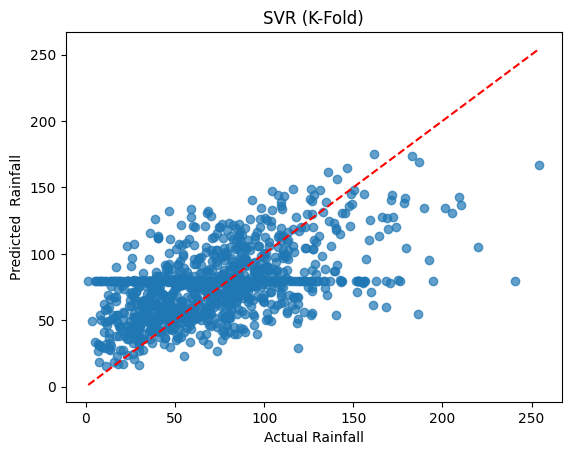

SVR (K-Fold) → MAE: 26.26, RMSE: 33.52, R²: 0.260


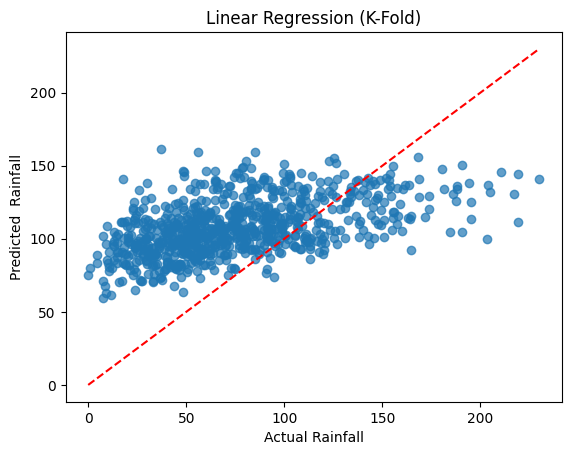

Linear Regression (K-Fold) → MAE: 42.32, RMSE: 48.99, R²: -0.356


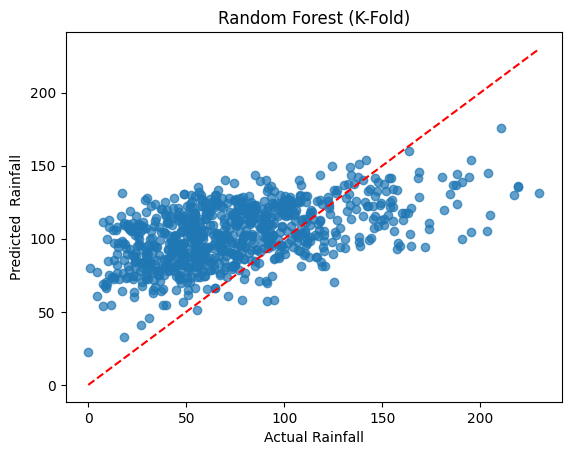

Random Forest (K-Fold) → MAE: 38.74, RMSE: 45.58, R²: -0.174


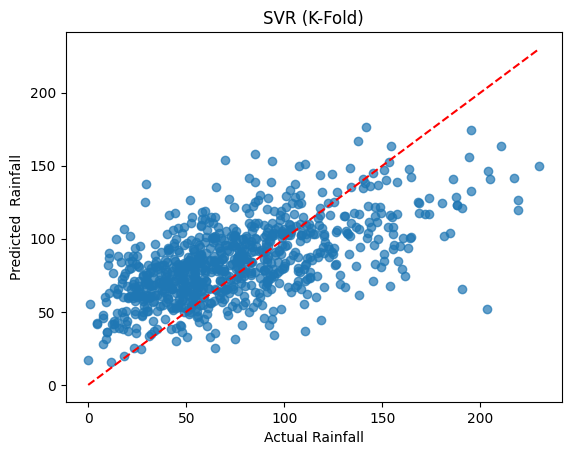

SVR (K-Fold) → MAE: 27.98, RMSE: 34.73, R²: 0.318


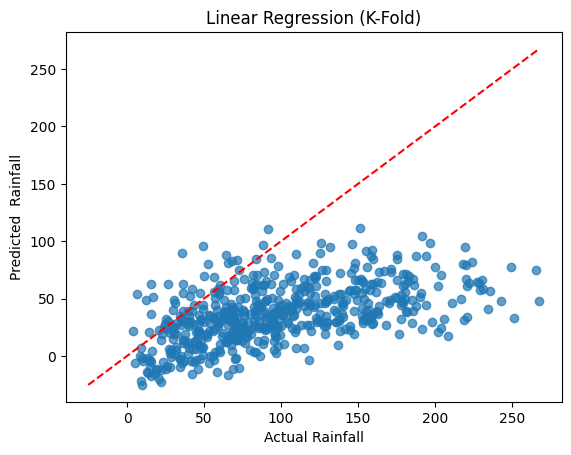

Linear Regression (K-Fold) → MAE: 63.49, RMSE: 77.51, R²: -0.929


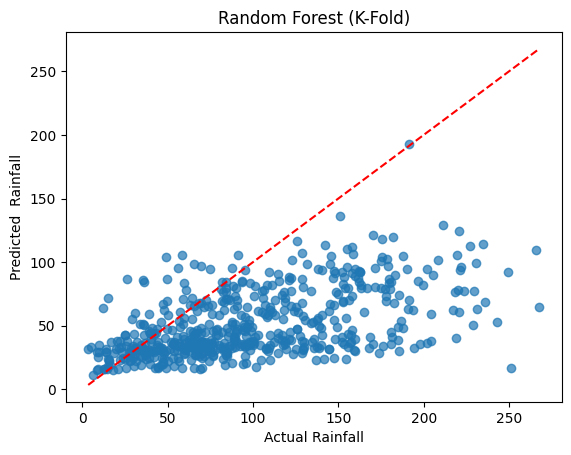

Random Forest (K-Fold) → MAE: 51.50, RMSE: 66.73, R²: -0.430


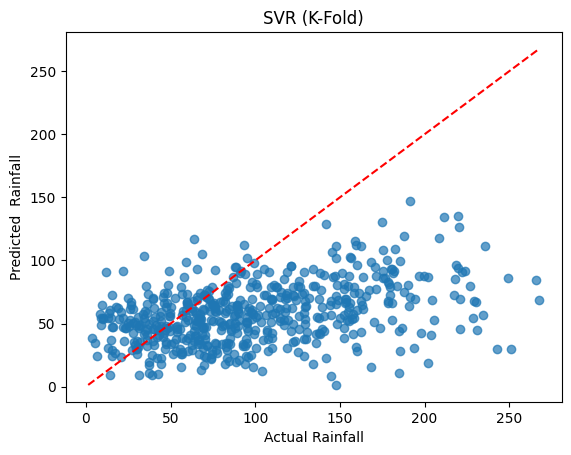

SVR (K-Fold) → MAE: 49.98, RMSE: 65.19, R²: -0.365


In [ ]:
# Groups

groups = np.select([df['Station_Cardiff'] == 1, df['Station_Valley'] == 1], ['Cardiff', 'Valley'], default='Aberporth')
gkf = GroupKFold(n_splits=3)

# Models

lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=1)

# K-Fold Sect

for train_idx, test_idx in gkf.split(X, y, groups):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    
    # Linear Regression
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    predicted_vs_actual(y_test,y_pred_lr, "Linear Regression (K-Fold)")
    evaluate(y_test, y_pred_lr, "Linear Regression (K-Fold)")

    # Random Forest
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    predicted_vs_actual(y_test,y_pred_rf, "Random Forest (K-Fold)")
    evaluate(y_test, y_pred_rf, "Random Forest (K-Fold)")

    # SVR 
    svr.fit(X_train, y_train)
    y_pred_svr = svr.predict(X_test)
    predicted_vs_actual(y_test, y_pred_svr, "SVR (K-Fold)")
    evaluate(y_test, y_pred_svr, "SVR (K-Fold)")

---

## Station Specific

### Aberporth

In [52]:
lr.fit(X_train_aber, y_train_aber)
y_pred_lr_aber = lr.predict(X_test_aber)
evaluate(y_test_aber, y_pred_lr_aber, "Aberporth LR")

Aberporth LR → MAE: 28.42, RMSE: 36.14, R²: 0.204


In [53]:
rf.fit(X_train_aber, y_train_aber)
y_pred_rf_aber = rf.predict(X_test_aber)
evaluate(y_test_aber, y_pred_rf_aber, "Aberporth LR")

Aberporth LR → MAE: 31.46, RMSE: 40.08, R²: 0.021


In [54]:
svr.fit(X_train_aber, y_train_aber)
y_pred_svr_aber = svr.predict(X_test_aber)
evaluate(y_test_aber, y_pred_svr_aber, "Aberporth LR")

Aberporth LR → MAE: 32.20, RMSE: 41.68, R²: -0.059


### Cardiff

In [55]:
lr.fit(X_train_cardiff, y_train_cardiff)
y_pred_lr_cardiff = lr.predict(X_test_cardiff)
evaluate(y_test_cardiff, y_pred_lr_cardiff, "Cardiff LR")

Cardiff LR → MAE: 34.81, RMSE: 44.90, R²: 0.338


In [56]:
rf.fit(X_train_cardiff, y_train_cardiff)
y_pred_rf_cardiff = rf.predict(X_test_cardiff)
evaluate(y_test_cardiff, y_pred_rf_cardiff, "Cardiff RF")

Cardiff RF → MAE: 34.07, RMSE: 43.96, R²: 0.366


In [57]:
svr.fit(X_train_cardiff, y_train_cardiff)
y_pred_svr_cardiff = svr.predict(X_test_cardiff)
evaluate(y_test_cardiff, y_pred_svr_cardiff, "Cardiff SVR")

Cardiff SVR → MAE: 42.35, RMSE: 52.67, R²: 0.089


### Valleys

In [58]:
lr.fit(X_train_valley, y_train_valley)
y_pred_lr_valley = lr.predict(X_test_valley)
evaluate(y_test_valley, y_pred_lr_valley, "Valley LR")

Valley LR → MAE: 25.30, RMSE: 32.02, R²: 0.248


In [59]:
rf.fit(X_train_valley, y_train_valley)
y_pred_rf_valley = rf.predict(X_test_valley)
evaluate(y_test_valley, y_pred_rf_valley, "Valley RF")

Valley RF → MAE: 27.55, RMSE: 34.09, R²: 0.147


In [60]:
svr.fit(X_train_valley, y_train_valley)
y_pred_svr_valley = svr.predict(X_test_valley)
evaluate(y_test_valley, y_pred_svr_valley, "Valley RF")

Valley RF → MAE: 31.04, RMSE: 38.92, R²: -0.111


---

## All Stations 80-20 Split

### Linear Regression

Linear Regression (All Data) → MAE: 32.18, RMSE: 41.16, R²: 0.166


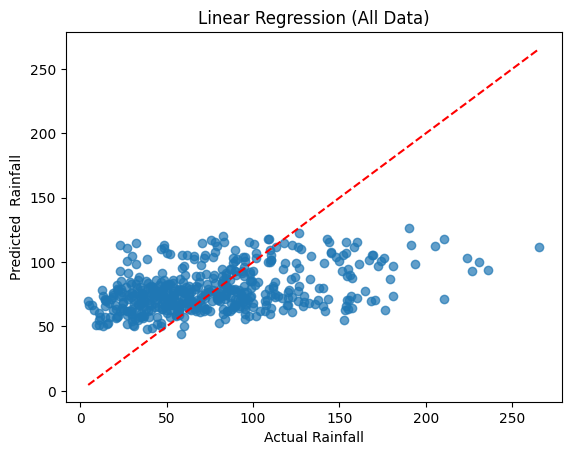

In [61]:
lr.fit(X1_train, y1_train)
y_pred_lr_all = lr.predict(X1_test)
evaluate(y1_test, y_pred_lr_all, "Linear Regression (All Data)") 
predicted_vs_actual(y1_test, y_pred_lr_all,"Linear Regression (All Data)")

### Random Forest

Random Forrest (All Data) → MAE: 29.08, RMSE: 38.20, R²: 0.282


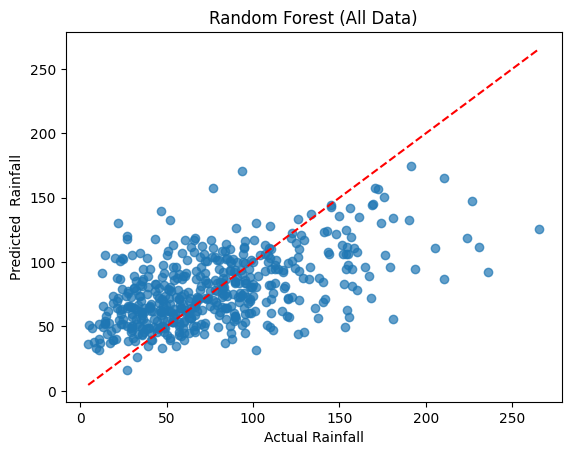

In [62]:
rf.fit(X1_train, y1_train)
y_pred_rf_all = rf.predict(X1_test)
evaluate(y1_test, y_pred_rf_all, "Random Forrest (All Data)")
predicted_vs_actual(y1_test, y_pred_rf_all, "Random Forest (All Data)")

### SVR

SVR (All Data) → MAE: 8.25, RMSE: 17.95, R²: 0.842


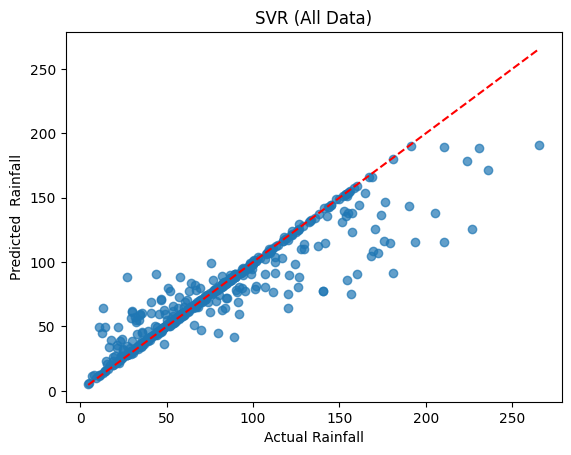

In [63]:
svr.fit(X1_test, y1_test)
y_pred_svr_all = svr.predict(X1_test)
evaluate(y1_test, y_pred_svr_all, "SVR (All Data)")
predicted_vs_actual(y1_test, y_pred_svr_all, "SVR (All Data)")

---

## Additional Graphs

### Average Features Graph

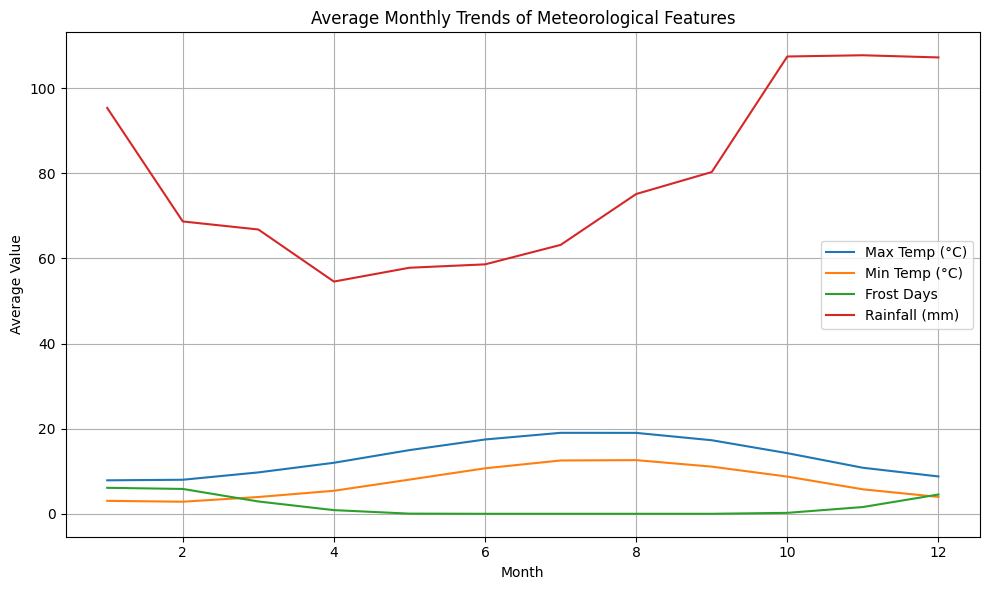

In [64]:
monthly_avgs = df.groupby('Month')[['MaxTemp', 'MinTemp', 'FrostDays', 'Rainfall']].mean()

plt.figure(figsize=(10,6))
plt.plot(monthly_avgs.index, monthly_avgs['MaxTemp'], label='Max Temp (°C)')
plt.plot(monthly_avgs.index, monthly_avgs['MinTemp'], label='Min Temp (°C)')
plt.plot(monthly_avgs.index, monthly_avgs['FrostDays'], label='Frost Days')
plt.plot(monthly_avgs.index, monthly_avgs['Rainfall'], label='Rainfall (mm)')
plt.title('Average Monthly Trends of Meteorological Features')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Bar Chart of $R^2$ Scores

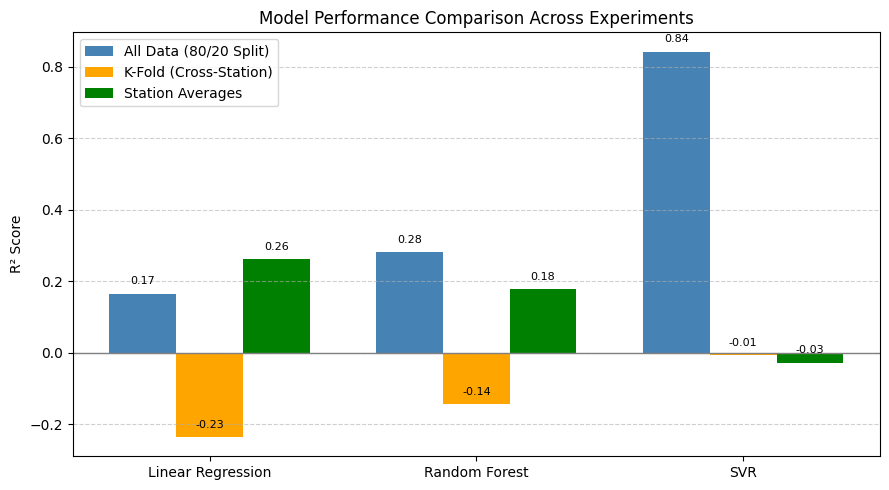

In [65]:
models = ['Linear Regression', 'Random Forest', 'SVR']

# Three experiment results
r2_all = [0.166, 0.282, 0.842]
r2_kfold = [-0.235, -0.142, -0.006]
r2_station = [0.263, 0.178, -0.027]  # your station averages

x = np.arange(len(models))  # model positions
width = 0.25                # narrower bars to fit 3 groups

fig, ax = plt.subplots(figsize=(9,5))
bars1 = ax.bar(x - width, r2_all, width, label='All Data (80/20 Split)', color='steelblue')
bars2 = ax.bar(x, r2_kfold, width, label='K-Fold (Cross-Station)', color='orange')
bars3 = ax.bar(x + width, r2_station, width, label='Station Averages', color='green')

# Axis labels and title
ax.set_ylabel('R² Score')
ax.set_title('Model Performance Comparison Across Experiments')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.axhline(0, color='grey', linewidth=1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate bar values
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2f}",
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


### Bar Chart (MSE)

C:\Users\amirs\AppData\Local\Temp\ipykernel_20892\3208343970.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


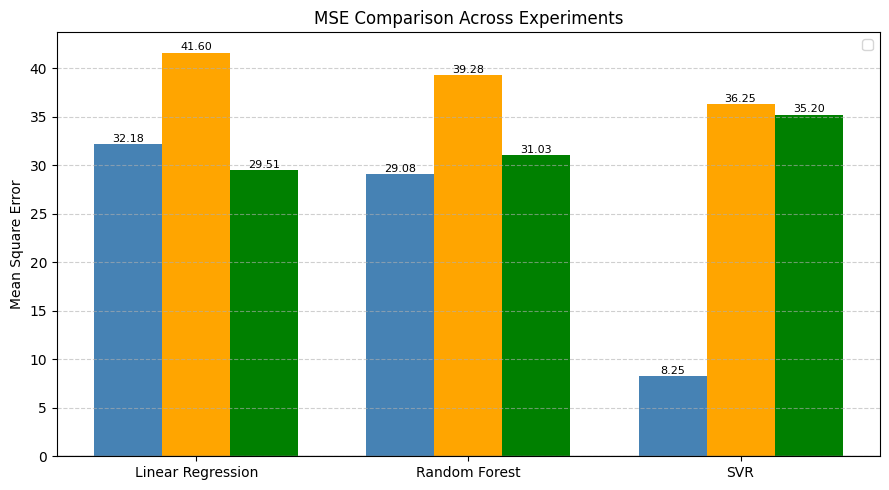

In [66]:
models = ['Linear Regression', 'Random Forest', 'SVR']

# Three experiment results
r2_all = [32.18, 29.08, 8.25]
r2_kfold = [41.6, 39.28, 36.25]
r2_station = [29.51, 31.03, 35.2]  
x = np.arange(len(models)) 
width = 0.25               
fig, ax = plt.subplots(figsize=(9,5))
bars1 = ax.bar(x - width, r2_all, width, color='steelblue')
bars2 = ax.bar(x, r2_kfold, width, color='orange')
bars3 = ax.bar(x + width, r2_station, width, color='green')

# Axis labels and title
ax.set_ylabel('Mean Square Error')
ax.set_title('MSE Comparison Across Experiments')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.axhline(0, color='grey', linewidth=1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate bar values
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2f}",
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Residuals')

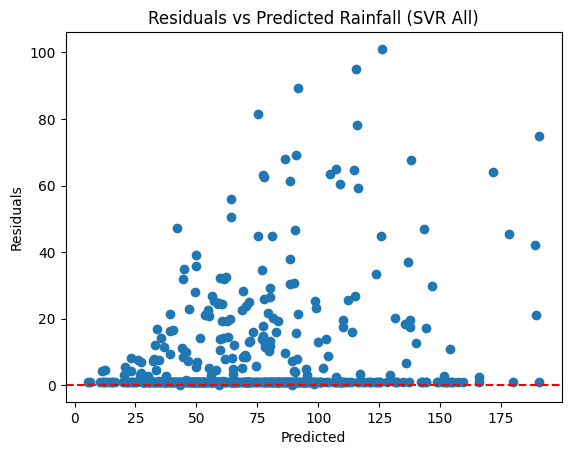

In [67]:
residuals = np.abs(y1_test - y_pred_svr_all)
plt.scatter(y_pred_svr_all, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Rainfall (SVR All)")
plt.xlabel("Predicted")
plt.ylabel("Residuals")